In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib as mpl
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#1.Загрузить файл hr.csv.
hr=pd.read_csv('hr.csv')

In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
#2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
#среднее
hr.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [8]:
#медиана
hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [9]:
#мода
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#мин
hr.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [11]:
#макс
hr.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [12]:
#сред.отклонение
hr.var()

satisfaction_level          0.061817
last_evaluation             0.029299
number_project              1.519284
average_montly_hours     2494.313175
time_spend_company          2.131998
Work_accident               0.123706
left                        0.181411
promotion_last_5years       0.020817
dtype: float64

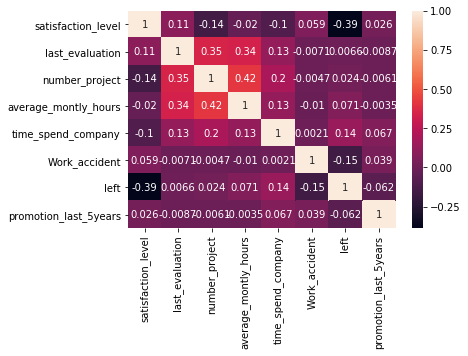

In [14]:
#3.Рассчитать и визуализировать корреляционную матрицу для переменных.
corr = hr.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

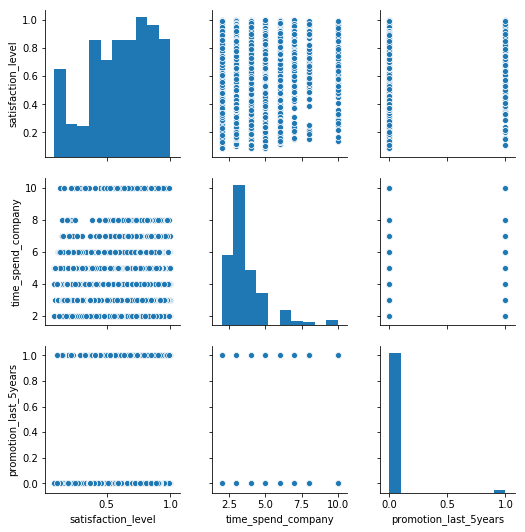

In [21]:
#4.Визуализировать несколько взаимосвязей между переменными.
sns.pairplot(hr,vars=['satisfaction_level','time_spend_company', 'promotion_last_5years'],
                 kind='scatter')    

In [24]:
#5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.


Ttest_relResult(statistic=-234.6964449672185, pvalue=0.0)

In [19]:
#гипотеза 1: среднее значение уровня удовлетворенности (параметр satisfaction_level) у уволенных сотрудников 
#не отличается от среднего значения этого параметра у работающих сотрудников
hr_left=hr[hr['left']==1]['satisfaction_level']
hr_work=hr[hr['left']==0]['satisfaction_level']
mean_left=hr_left.mean()
mean_work=hr_work.mean()

print("mean_left=",mean_left)
print("mean_work=",mean_work)
#в среднем, satisfaction_level для уволенных сотрудников не совпадает с satisfaction_level у работающих сотрудников
stats.ttest_ind(hr_left, hr_work)
#t-test показал, что нулевая гипотеза опровергнута
#следовательно, различие средних статистически значимо
#следовательно, параметр left коррелирует с параметром satisfaction_level

mean_left= 0.44009801176140917
mean_work= 0.666809590479516


Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [17]:
#гипотеза 2: среднее значение грейда (параметр last_evaluation) у уволенных сотрудников 
#не отличается от среднего значения этого параметра у работающих сотрудников
hr_left=hr[hr['left']==1]['last_evaluation']
hr_work=hr[hr['left']==0]['last_evaluation']
mean_left=hr_left.mean()
mean_work=hr_work.mean()

print("mean_left=",mean_left)
print("mean_work=",mean_work)
#в среднем, last_evaluation для уволенных сотрудников примерно совпадает с last_evaluation у работающих сотрудников
stats.ttest_ind(hr_left, hr_work)
#t-test показал, что нулевая гипотеза не опровергнута
#следовательно, различие средних статистически не значимо
#следовательно, параметр left не коррелирует с параметром last_evaluation

mean_left= 0.7181125735088183
mean_work= 0.7154733986699274


Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

In [34]:
#6.Рассчитать сколько работников работает в каждом департаменте.
hr_stat=hr.groupby('number_project').agg(['count'])['satisfaction_level']
hr_stat

,count
number_project,
2,2388
3,4055
4,4365
5,2761
6,1174
7,256


C:\Users\mkharlanchuk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.


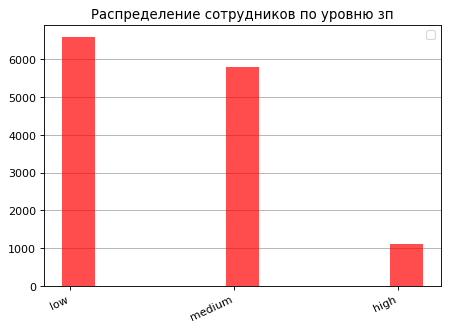

In [102]:
#7.Показать распределение сотрудников по зарплатам.
hr_stat_salary=hr.groupby('salary').agg(['count'])['satisfaction_level'].reset_index()
def order_salary (row):
        if row['salary'] =='low':
            return 1
        elif row['salary'] =='medium':
            return 2
        elif row['salary'] =='high':
            return 3
 


hr_stat_salary['order_salary']=hr_stat_salary.apply(order_salary,axis=1)
hr_stat_salary=hr_stat_salary.sort_values('order_salary')
salary=np.array(hr_stat_salary['salary'])
salary
cnt=np.array(hr_stat_salary['count'])
cnt
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.title('Распределение сотрудников по уровню зп')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

xs = range(len(salary))

plt.bar([x + 0.05 for x in xs], [ d * 0.9 for d in cnt],
        width = 0.2, color = 'red', alpha = 0.7, 
        zorder = 2)

plt.xticks(xs, salary)

fig.autofmt_xdate(rotation = 25)

plt.legend(loc='upper right')


C:\Users\mkharlanchuk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


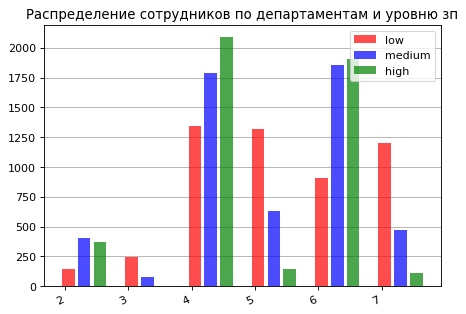

In [121]:
#8.Показать распределение сотрудников по зарплатам совместно с департаментами.




hr_stat_sd=hr.groupby(['salary','number_project']).agg(['count'])['satisfaction_level'].reset_index()
def order_salary (row):
        if row['salary'] =='low':
            return 1
        elif row['salary'] =='medium':
            return 2
        elif row['salary'] =='high':
            return 3
        
hr_stat_sd['order_salary']=hr_stat_sd.apply(order_salary,axis=1)
hr_stat_sd=hr_stat_sd.sort_values(['number_project','order_salary'])

salary=hr_stat_sd['salary']
number_project=hr_stat_sd['number_project']
cnt=hr_stat_sd['count']
hr_dep=hr.groupby(['number_project']).agg(['count']).reset_index().sort_values('number_project')['number_project']


dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.title('Распределение сотрудников по департаментам и уровню зп')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

xs = range(len(hr_dep))

plt.bar([x + 0.05 for x in xs], [ cnt[d * 3] for d in xs],
        width = 0.2, color = 'red', alpha = 0.7, label = 'low',
        zorder = 2)
plt.bar([x + 0.3 for x in xs], [ cnt[d * 3 + 1] for d in xs],
        width = 0.2, color = 'blue', alpha = 0.7, label = 'medium',
        zorder = 2)
plt.bar([x + 0.55 for x in xs], [ cnt[d * 3 + 2] for d in xs],
        width = 0.2, color = 'green', alpha = 0.7, label = 'high',
        zorder = 2)

plt.xticks(xs, hr_dep)

fig.autofmt_xdate(rotation = 25)

plt.legend(loc='upper right')


In [3]:
#9.Сколько сотрудников покинули компанию.
hr_left=hr[hr['left']==1]
left_count=len(hr_left)
print('left_count = ', left_count)



left_count =  3571


In [ ]:
#10.Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

In [11]:
# гипотеза 1: уровень зп у уволенных сотрудников не отличается от уровня зп всех сотрудников. 
# Уровни зп:1-low,2-mediun, 3-high
def num_salary (row):
        if row['salary'] =='low':
            return 1
        elif row['salary'] =='medium':
            return 2
        elif row['salary'] =='high':
            return 3
        
hr['num_salary']=hr.apply(num_salary,axis=1)
hr_left=hr[hr['left']==1]['num_salary']
hr_all=hr['num_salary']
mean_left=hr_left.mean()
mean_all=hr_all.mean()

print("mean_left=",mean_left)
print("mean_all=",mean_all)
#если судить по среднему, то уровень зп уволенных сотрудников ниже, чем у полной выборки
stats.ttest_ind(hr_left, hr_all)
#t-test показал, что нулевая гипотеза опровергнута
#следовательно, различие средних статистически значимо



mean_left= 1.4147297675721087
mean_all= 1.5947063137542503


Ttest_indResult(statistic=-15.609121339562568, pvalue=1.402692061060188e-54)

In [14]:
#гипотеза 2: среднее количество повышений у уволенных сотрудников(promotion_last_5years) равно среднему количеству повышений по выборке
hr_left=hr[hr['left']==1]['promotion_last_5years']
hr_all=hr['promotion_last_5years']
mean_left=hr_left.mean()
mean_all=hr_all.mean()

print("mean_left=",mean_left)
print("mean_all=",mean_all)
#уволенных сотрудников в среднем повышали реже,чем всех сотрудников
stats.ttest_ind(hr_left, hr_all)
#t-test показал, что нулевая гипотеза опровергнута
#следовательно, различие средних статистически значимо

mean_left= 0.005320638476617194
mean_all= 0.021268084538969265


Ttest_indResult(statistic=-6.413643328231173, pvalue=1.4551089203761006e-10)

In [15]:
#гипотеза 3: среднее значение грейда (параметр last_evaluation) у уволенных сотрудников 
#не отличается от среднего значения этого параметра по выборке
hr_left=hr[hr['left']==1]['last_evaluation']
hr_all=hr['last_evaluation']
mean_left=hr_left.mean()
mean_all=hr_all.mean()

print("mean_left=",mean_left)
print("mean_all=",mean_all)
#в среднем, last_evaluation для уволенных сотрудников примерно совпадает с last_evaluation по всей выборке
stats.ttest_ind(hr_left, hr_all)
#t-test показал, что нулевая гипотеза не опровергнута
#следовательно, различие средних статистически не значимо

mean_left= 0.7181125735088183
mean_all= 0.7161017401159978


Ttest_indResult(statistic=0.6116021924432762, pvalue=0.540808475065452)